<a href="https://colab.research.google.com/github/vaibhavm291/DESIGN-AND-DEVELOPMENT-OF-HYBRID-MODEL-FOR-EFFICIENT-PREDICTION-OF-STOCK-PRICES/blob/main/LR%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
ticker = "TCS.NS"  # You can change to any stock symbol like 'TCS.NS' for TCS
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

/tmp/ipython-input-4-182211263.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [6]:
data = data[["Close"]]  # We'll use 'Close' price
data["Target"] = data["Close"].shift(-1)  # Predict next day's price

data.dropna(inplace=True)  # Remove last row which will have NaN target

X = data[["Close"]]  # Current day's close as input
y = data["Target"]  # Next day's close as output

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

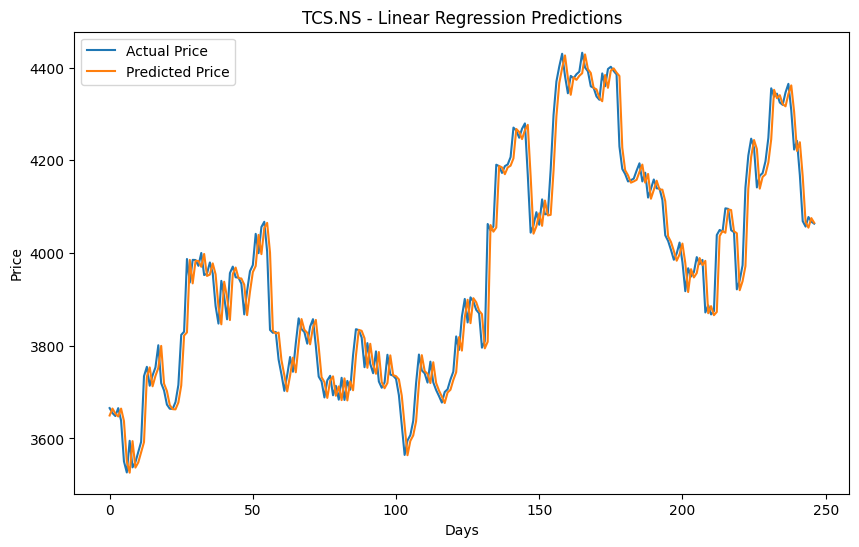

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title(f"{ticker} - Linear Regression Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, predictions))
print("R² Score:", r2_score(y_test, predictions))


MSE: 2708.079695603899
R² Score: 0.9511437530215854
